### ===Task===

Your work: Let's modify the above scratch code:
- Modify so it performs early stopping when the log likelihood does not improve anymore.
- Perform plotting every 5 iterations on the resulting clusters.

In [5]:
from scipy.stats import multivariate_normal
import math
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import time

NLL Smaller ?  -40615.6462915977
NLL Difference:  40615.6462915977
NLL Smaller ?  -637359.1993945703
NLL Difference:  11755.501425106311
NLL Smaller ?  -640848.9914355297
NLL Difference:  26.021094257128425
Final NLL:  -640861.6548429157
Final Difference:  3.3478516321629286
Time:  16.4434175491333


Text(0.5, 1.0, 'Final')

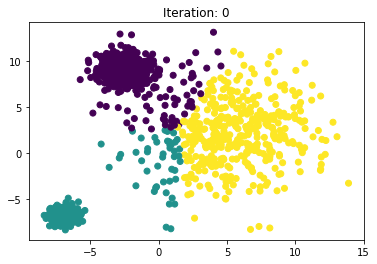

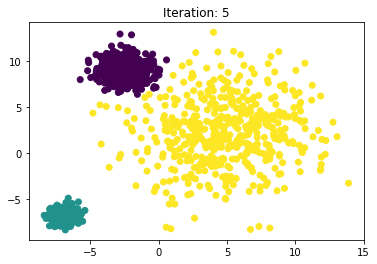

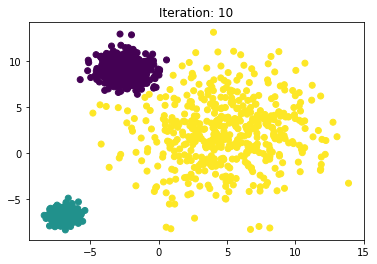

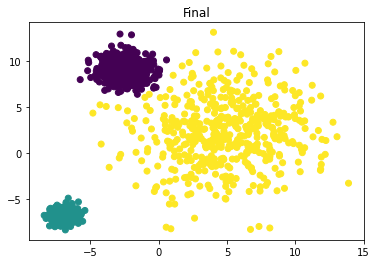

In [13]:
X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)

#define basic params
m, n = X.shape
K = 3
max_iter = 20

oldNLL = 0    #<--

#==initialization==

#responsibliity
r = np.full(shape=(m, K), fill_value=1/K)

#pi
pi = np.full((K, ), fill_value=1/K) #simply use 1/k for pi

#mean
random_row = np.random.randint(low=0, high=m, size=K)
mean = np.array([X[idx,:] for idx in random_row ]).T #.T to make to shape (M, K)

#covariance
cov = np.array([np.cov(X.T) for _ in range (K)])

start = time.time()
for iteration in range(max_iter):

    #===E-Step=====
    #Update r_ik of each sample
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            r[i, k] = pi[k] * xi_pdf
        r[i] /= np.sum(r[i])
        
    NLL = 0
    for i in range(m):
        for k in range(K):
            NLL += math.log(pi[k])
            NLL += multivariate_normal.logpdf(
                X[i], mean=mean[:, k], cov=cov[k])
    
    #Show every 5 iteration plot once
    if(iteration % 5 == 0):
        preds = np.argmax(r, axis=1)
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=preds)
        plt.title(f"Iteration: {iteration}")
        print("NLL Smaller ? ", NLL)
        print("NLL Difference: ", math.fabs(NLL - oldNLL))
    
    
    if(math.fabs(NLL-oldNLL) < 5):
        print("Final NLL: ", NLL)
        print("Final Difference: ", math.fabs(NLL - oldNLL))
        break
    oldNLL = NLL
    
    
    #===M-Step====
    # Find NK first for latter use
    NK = np.sum(r, axis=0)
    assert NK.shape == (K, )
    
    #PI
    pi = NK / m
    assert pi.shape == (K, )
    
    #mean
    mean =  ( X.T @ r ) / NK
    assert mean.shape == (n, K)
    
    #covariance (also called Sigma)
    cov = np.zeros((K, n, n))
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i, k] * (X_mean @ X_mean.T)
        cov[k] /= NK[k]
    assert cov.shape == (K, n, n)
    
end = time.time() - start
print('Time: ', end)

#get preds
yhat = np.argmax(r, axis=1)

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final")